### Multiple Linear Regression

**Simple Linear Regression**
<br>
$ y_{pred} = b_0 + b_1X $ 
<br>
$L(b_o, b_1) = \frac{1}{n}\sum_{i=1}^{n}(y-(b_0+b_1x))^2 $
<br>
<br>
**Multiple Linear Regression**
<br>
$ y_{pred} = b_0 + b_1X_1 + b_2X_2 + b_3X_3 + ... +b_nX_n $
<br>
$ L(b) = \frac{1}{n}\sum_{i=1}^{n}(y-(b_0+b_1x+ b_2X_2 + b_3X_3 + ... + b_nX_n))^2 $
<br>
$ L(b) = \frac{1}{n}\sum_{i=1}^{n}(y-\sum_{j=1}^{n}b_jX_j)^2 $

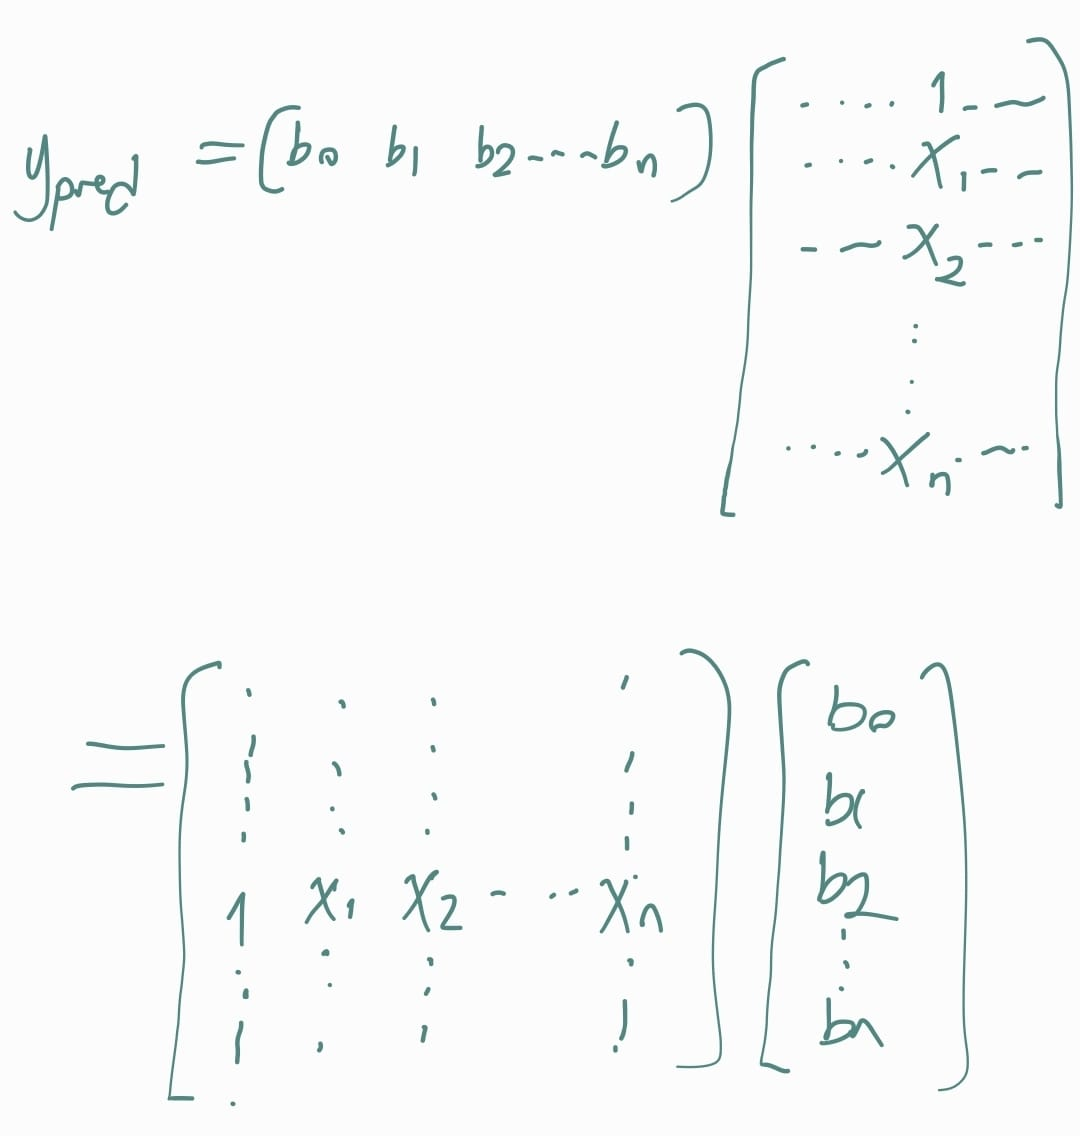

In [55]:
from IPython.display import Image

path=r"C:\Users\serhat.tadik\Downloads\y_pred.jpeg"
Image(data = path, width=400)

In [1]:
import pandas as pd
import numpy as np
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df = pd.DataFrame(Stock_Market)
df = df[["Interest_Rate","Unemployment_Rate","Stock_Index_Price"]]
df.head()


,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


Text(0, 0.5, 'Stock Index Price')

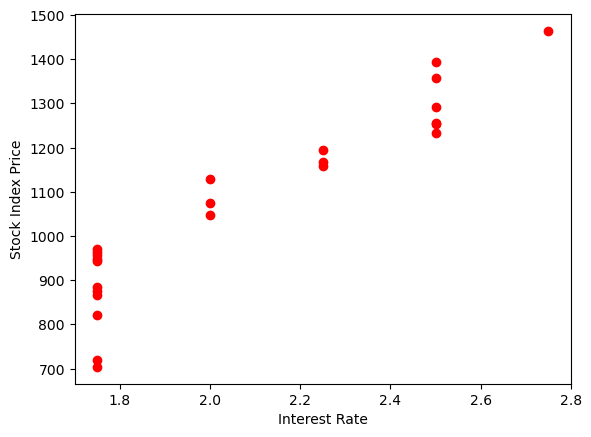

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.xlabel("Interest Rate")
plt.ylabel("Stock Index Price")

Text(0, 0.5, 'Stock Index Price')

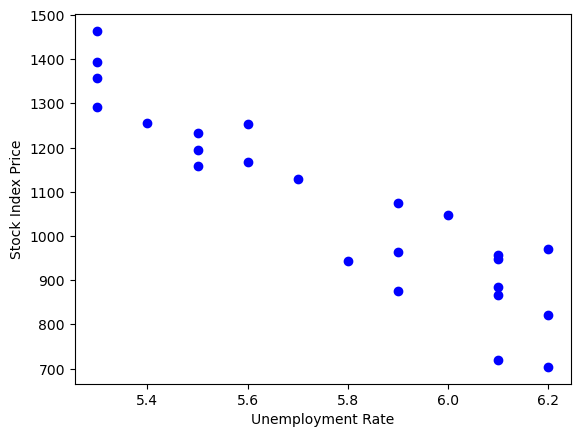

In [3]:
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='blue')
plt.xlabel("Unemployment Rate")
plt.ylabel("Stock Index Price")

In [4]:
df["00"] = np.ones(len(df,))
df = df.reindex(['00','Interest_Rate','Unemployment_Rate',"Stock_Index_Price"], axis=1)
df.head()

,00,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,1.0,2.75,5.3,1464
1,1.0,2.50,5.3,1394
2,1.0,2.50,5.3,1357
3,1.0,2.50,5.3,1293
4,1.0,2.50,5.4,1256


In [5]:
X = df.drop(columns="Stock_Index_Price")
y = df.iloc[:, 3]

In [6]:
X

,00,Interest_Rate,Unemployment_Rate
0,1.0,2.75,5.3
1,1.0,2.50,5.3
2,1.0,2.50,5.3
3,1.0,2.50,5.3
4,1.0,2.50,5.4
5,1.0,2.50,5.6
6,1.0,2.50,5.5
7,1.0,2.25,5.5
8,1.0,2.25,5.5
9,1.0,2.25,5.6


In [7]:
theta = np.zeros((len(X.columns),))

In [8]:
theta

array([0., 0., 0.])

In [9]:
m = len(df)

In [10]:
m

24

In [11]:
def computeCost(X, y, theta):
    y_pred = X@theta
    return sum((y_pred-y)**2)/2

In [12]:
from tqdm import tqdm

def gradientDescent(X, y, theta, alpha, epoch):
    J = []  # Cost function in each iteration
    for k in tqdm(range(epoch)):        
        y_pred = X @ theta
        for c in range(len(X.columns)):
            theta[c] = theta[c] - alpha * (sum((y_pred - y) * X.iloc[:, c]) / len(X))
        j = computeCost(X, y, theta)
        J.append(j)
    return J, j, theta


In [13]:
J, j, theta = gradientDescent(X, y, theta, 0.01, 400000)


100%|██████████| 400000/400000 [04:17<00:00, 1550.65it/s]


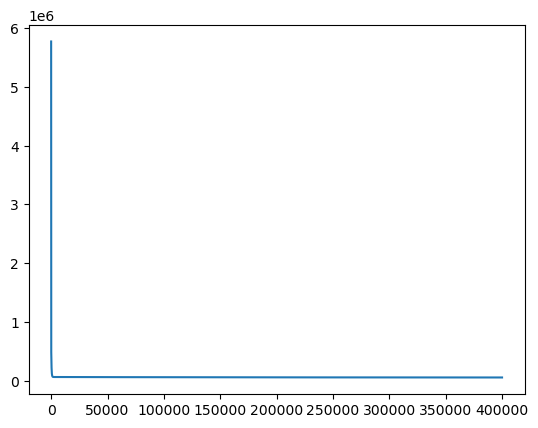

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(J)), J)
plt.show()

In [15]:
theta

array([1156.71448399,  421.72913405, -166.40695371])

In [16]:
X.shape

(24, 3)

In [17]:
y_hat = X@theta
y_hat

0     1434.512748
1     1329.080464
2     1329.080464
3     1329.080464
4     1312.439769
5     1279.158378
6     1295.799074
7     1190.366790
8     1190.366790
9     1173.726095
10    1051.653116
11    1018.371725
12    1001.731030
13     912.939442
14     929.580137
15     879.658051
16     863.017356
17     879.658051
18     879.658051
19     879.658051
20     912.939442
21     863.017356
22     863.017356
23     879.658051
dtype: float64

In [18]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_hat, y))

4462.250070879619


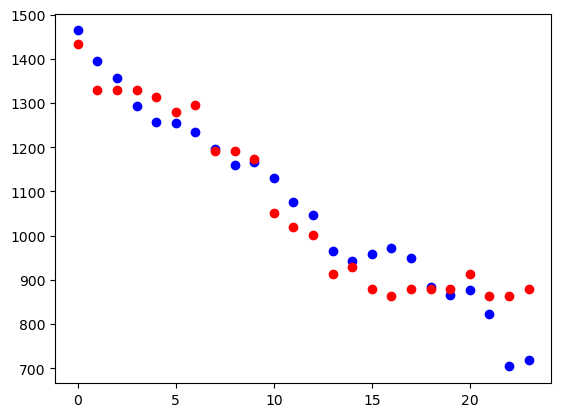

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 24)),y= y, color='blue')         
plt.scatter(x=list(range(0, 24)), y=y_hat, color='red')
plt.show()

***In gradient descent algorithm we calculate the cost for every step. And if our input values differ by order of magnitude then results after every gradient descent step will also vary a lot.
We can avoid this by changing the range of our input variables.***

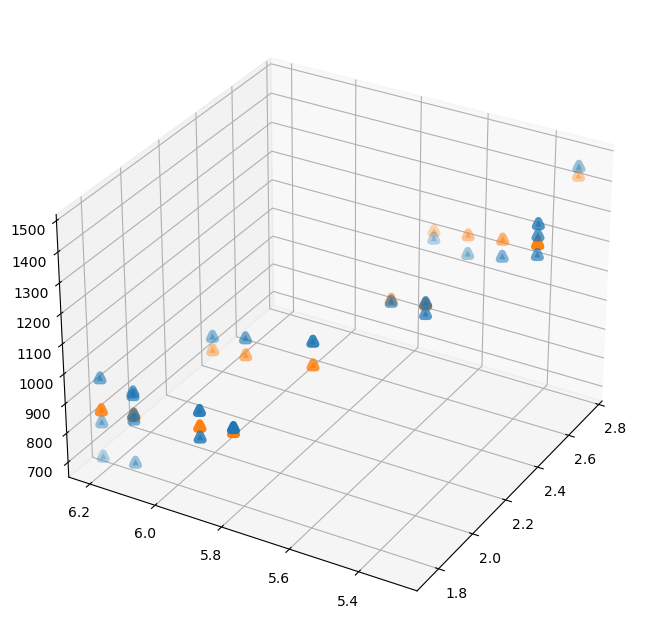

In [20]:
fig = plt.figure(figsize=(8,12))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = df.iloc[:,1]
yline = df.iloc[:,2]
ax.scatter3D(xline, yline, y, marker = '^', linewidth=5)
ax.view_init(30,210)

ax.scatter3D(xline, yline, y_hat, marker = '^', linewidth=5)

plt.show()

### Implementation in Sklearn

In [21]:
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.coef_
reg.intercept_
reg.predict(np.array([[3,5]]))

array([16.])

In [22]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df = pd.DataFrame(Stock_Market)

In [23]:
X = df[['Interest_Rate','Unemployment_Rate']].astype(float) # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
y = df['Stock_Index_Price'].astype(float) # output variable (what we are trying to predict)


In [24]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)

[ 345.54008701 -250.14657137]
1798.403977625855


In [25]:
y_hat = regr.predict(X)

In [26]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_hat, y))

4356.611357123127


### Overfitting and a Potential Solution: Regularization

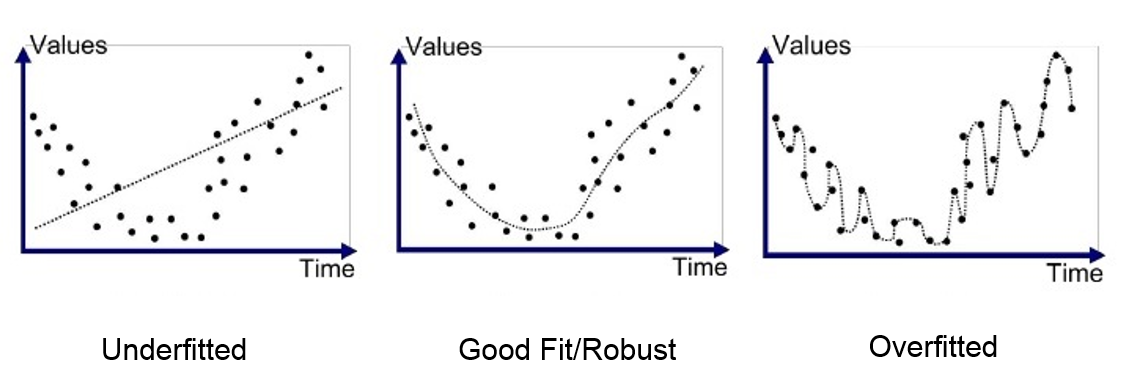

In [40]:
from IPython.display import Image

path=r"C:\Users\serhat.tadik\Downloads\fitting.png"
Image(data = path, width=700)

$
L(b_0, b_1) = \sum_{i=1}^{n}(y_{true}-(b_0+b_1x))^2
$ <br> <br>
***Lasso:*** <br> 
$
L(b_0, b_1) = \sum_{i=1}^{n}(y_{true}-(b_0+b_1x))^2 + \lambda(|b_0|+|b_1|) 
$ <br> <br>
***Ridge:*** <br>
$
L(b_0, b_1) = \sum_{i=1}^{n}(y_{true}-(b_0+b_1x))^2 + \lambda(b_0^2+b_1^2) 
$ <br> <br>


*This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.*

*Now, this will adjust the coefficients based on your training data. If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.*

**This sheds light on the obvious disadvantage of ridge regression, which is model interpretability. It will shrink the coefficients for least important predictors, very close to zero. But it will never make them exactly zero. In other words, the final model will include all predictors. However, in the case of the lasso, the L1 penalty has the eﬀect of forcing some of the coeﬃcient estimates to be exactly equal to zero when the tuning parameter λ is suﬃciently large. Therefore, the lasso method also performs variable selection and is said to yield sparse models.**

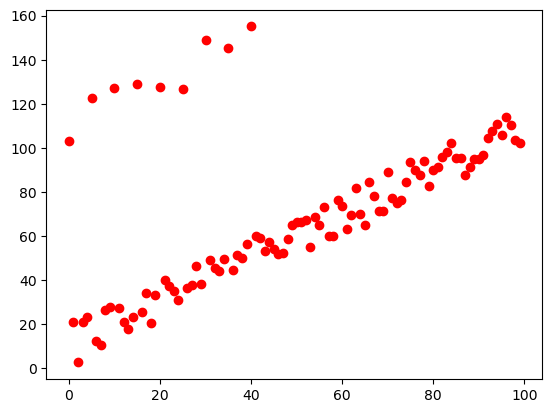

In [28]:
data2 = {"a":np.arange(0,100)}
outlier = np.zeros((100,))
outlier[[0,5,10,15,20,25,30,35,40]] = 100

data2["b"] =  data2["a"] + 20*np.random.rand(100) + outlier
df2 = pd.DataFrame(data2)
plt.plot(np.arange(0,100), df2['b'].values, 'ro')

#### No Regularization 

In [29]:
m = np.random.rand()
c = np.random.rand()

X = df2["a"].values
y = df2["b"].values

L=0.0001
epoch = 100000
n = X.shape[0]
for i in range(epoch):
    y_pred = m*X+c
    
    grad_c = (-2/n)*sum(y-y_pred)
    grad_m = (-2/n)*sum(X*(y-y_pred))
    
    m = m - L*grad_m
    c = c - L*grad_c

print(m,c)    

0.6512900962608078 37.35555251947421


#### Ridge Regularization

In [30]:
m2 = np.random.rand()
c2 = np.random.rand()

X = df2["a"].values
y = df2["b"].values

L=0.0001
epoch = 100000
lam = 0.5
n = X.shape[0]
for i in range(epoch):
    y_pred = m2*X+c2
    
    grad_c = (-2/n)*sum(y-y_pred) + 2*lam*c2
    grad_m = (-2/n)*sum(X*(y-y_pred)) + 2*lam*m2
    
    m2 = m2 - L*grad_m
    c2 = c2 - L*grad_c

print(m2,c2)    

1.0233601699264008 12.664549437327326


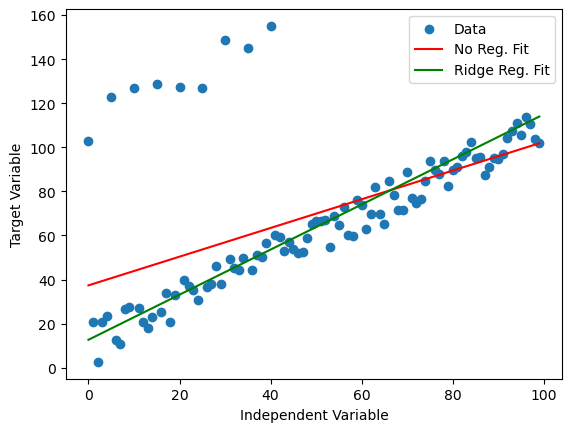

In [34]:
plt.scatter(X, y)
plt.plot(X, m*X+c,'red')
plt.plot(X, m2*X+c2, 'green')
plt.xlabel("Independent Variable")
plt.ylabel("Target Variable")
plt.legend(["Data", "No Reg. Fit", "Ridge Reg. Fit"])
plt.show()

#### Lasso Regularization

In [35]:
m3 = np.random.rand()
c3 = np.random.rand()

X = df2["a"].values
y = df2["b"].values

L=0.0001
epoch = 100000
lam = 10
n = X.shape[0]
for i in range(epoch):
    y_pred = m3*X+c3
    
    if c3>0:
        grad_c = (-2/n)*sum(y-y_pred) + lam
    else:
        grad_c = (-2/n)*sum(y-y_pred) - lam
    if m3>0:
        grad_m = (-2/n)*sum(X*(y-y_pred)) + lam
    else: 
        grad_m = (-2/n)*sum(X*(y-y_pred)) - lam
    m3 = m3 - L*grad_m
    c3 = c3 - L*grad_c

print(m3,c3)    

0.9405327498351538 18.068103908291725


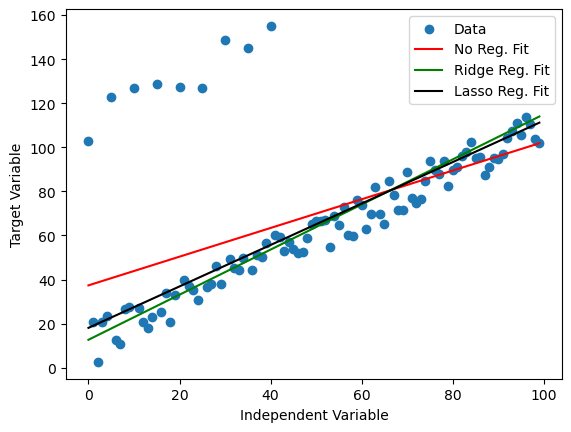

In [36]:
plt.scatter(X, y)
plt.plot(X, m*X+c,'red')
plt.plot(X, m2*X+c2, 'green')
plt.plot(X, m3*X+c3, 'black')
plt.xlabel("Independent Variable")
plt.ylabel("Target Variable")
plt.legend(["Data", "No Reg. Fit", "Ridge Reg. Fit", "Lasso Reg. Fit"])
plt.show()